## DNN for the Cardiovascular Disease dataset
The dataset consists of 70 000 records of patients data, 11 features + targe

https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset

### About Dataset
#### Data description

There are 3 types of input features:
* Objective: factual information;
* Examination: results of medical examination;
* Subjective: information given by the patient.

All of the dataset values were collected at the moment of medical examination.

#### Features:

|| | |  |
|---|-------------------|------|-------------|
|Age | Objective Feature | age | int (days)  |
|Height | Objective Feature | height | int (cm) |
|Weight | Objective Feature | weight | float (kg) |
|Gender | Objective Feature | gender | categorical code |
|Systolic blood pressure | Examination Feature | ap_hi | int |
|Diastolic blood pressure | Examination Feature | ap_lo | int |
|Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
|Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
|Smoking | Subjective Feature | smoke | binary |
|Alcohol intake | Subjective Feature | alco | binary |
|Physical activity | Subjective Feature | active | binary |
|Presence or absence of cardiovascular disease | Target Variable | cardio | binary |


In [37]:
# model selection and metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.model_selection import train_test_split
# Import scikit-learn dataset library
from sklearn import datasets
# keep track of times
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings

from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

In [38]:
df = pd.read_csv('cardio_train.csv', delimiter=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [39]:
features = ['gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active']
target = 'cardio'
X = np.array(df[features])
y = np.array(df[target])
print("Shape of features matrix: ")
print(X.shape)
print("Shape of target vector: ")
print(y.shape)
# Split dataset into training set and test set
print('After train/test spliting...')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=109)
# Creating a validation set from the training set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3,random_state=109) 
i = 0
print('Shape of train features matrix: ')
print(X_train.shape)
print('Shape of train target vector: ')
print(y_train.shape)
print(np.unique(y_train, return_counts=True))
pd.DataFrame(X_train, columns=features).head()

Shape of features matrix: 
(70000, 10)
Shape of target vector: 
(70000,)
After train/test spliting...
Shape of train features matrix: 
(39200, 10)
Shape of train target vector: 
(39200,)
(array([0, 1], dtype=int64), array([19631, 19569], dtype=int64))


,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,1.0,153.0,59.0,140.0,90.0,2.0,1.0,0.0,0.0,1.0
1,1.0,160.0,72.0,110.0,70.0,1.0,1.0,0.0,0.0,1.0
2,1.0,151.0,73.0,155.0,100.0,1.0,1.0,0.0,0.0,0.0
3,2.0,165.0,80.0,130.0,90.0,1.0,1.0,0.0,0.0,1.0
4,1.0,165.0,58.0,120.0,80.0,1.0,1.0,0.0,0.0,1.0


In [40]:
scaler = StandardScaler()
if i == 0:
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    X_val = scaler.transform(X_val)
    i+=1
else: pass
pd.DataFrame(X_train, columns=features).head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,-0.737011,-1.376447,-1.057632,0.086182,-0.033225,0.933096,-0.394565,-0.311144,-0.23917,0.497647
1,-0.737011,-0.527581,-0.152411,-0.137208,-0.135092,-0.538771,-0.394565,-0.311144,-0.23917,0.497647
2,-0.737011,-1.618980,-0.082779,0.197877,0.017709,-0.538771,-0.394565,-0.311144,-0.23917,-2.009456
3,1.356831,0.078752,0.404648,0.011719,-0.033225,-0.538771,-0.394565,-0.311144,-0.23917,0.497647
4,-0.737011,0.078752,-1.127264,-0.062745,-0.084159,-0.538771,-0.394565,-0.311144,-0.23917,0.497647


## This is our DNN Architecture

In [44]:
# Define the input shape
input_shape = (10,)

# Define the model architecture
model = Sequential()
model.reset_states() 
model.add(Dense(64, activation='relu', input_shape=input_shape))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)

print('Test loss:', loss)
print('Test accuracy:', accuracy)

Epoch 1/20
1225/1225 [==============================] - 6s 4ms/step - loss: 0.5984 - accuracy: 0.6913 - val_loss: 0.5659 - val_accuracy: 0.7223
Epoch 2/20
1225/1225 [==============================] - 4s 4ms/step - loss: 0.5738 - accuracy: 0.7186 - val_loss: 0.5555 - val_accuracy: 0.7321
Epoch 3/20
1225/1225 [==============================] - 5s 4ms/step - loss: 0.5646 - accuracy: 0.7230 - val_loss: 0.5587 - val_accuracy: 0.7296
Epoch 4/20
1225/1225 [==============================] - 5s 4ms/step - loss: 0.5616 - accuracy: 0.7254 - val_loss: 0.5531 - val_accuracy: 0.7329
Epoch 5/20
1225/1225 [==============================] - 5s 4ms/step - loss: 0.5632 - accuracy: 0.7249 - val_loss: 0.5542 - val_accuracy: 0.7330
Epoch 6/20
1225/1225 [==============================] - 4s 4ms/step - loss: 0.5601 - accuracy: 0.7253 - val_loss: 0.5641 - val_accuracy: 0.7289
Epoch 7/20
1225/1225 [==============================] - 4s 4ms/step - loss: 0.5598 - accuracy: 0.7263 - val_loss: 0.5545 - val_accuracy:

C:\Users\Anthony.Geglio\AppData\Local\Temp\ipykernel_7484\78460309.py:7: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(-1,21,1)


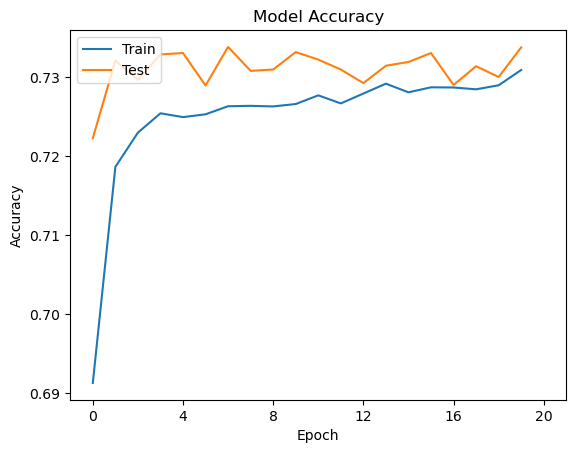

C:\Users\Anthony.Geglio\AppData\Local\Temp\ipykernel_7484\78460309.py:18: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(-1,21,1)


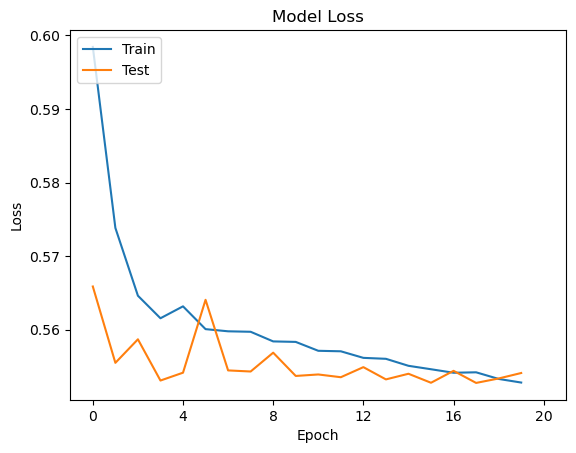

In [52]:
# Plot the training and validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xlim(-1,21,1)
plt.xticks(np.arange(0,21,4))
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot the training and validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xlim(-1,21,1)
plt.xticks(np.arange(0,21,4))
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()